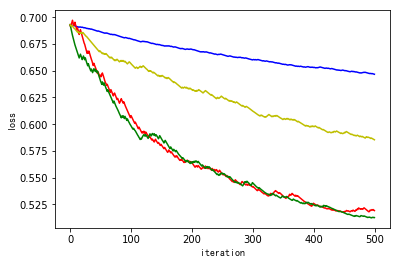

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.datasets import load_svmlight_file
from numpy import dot
import math
import random

lr = 0.1
iteration = 500
batchsize = 400
p = 0.9
epsilon = 1e-6
beta = 0.9

def get_data():
    data = load_svmlight_file("a9a")
    return data[0], data[1]

def split(x,y,tsize=0.2 ,rstate=33):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=tsize, random_state=rstate)
    return x_train, x_test, y_train, y_test


def h(x,w,i):
    return 1/(1+math.exp(-(np.dot(x[i],w))))

def logLoss(x,y,w):
    loss=0
    numOfsamples=x.shape[0]
    for i in range(numOfsamples):
        loss=loss-y[i]*math.log(h(x,w,i))-(1-y[i])*math.log(1-h(x,w,i))
    return loss/numOfsamples


def gradient(x,y,w,batchsize=100):
    grad = np.zeros(w.shape[0],)
    for i in range(batchsize):
        sample = random.randint(0,batchsize-1)
        hw = h(x,w,sample)
        grad = (hw-y[sample])*x[sample]
    return grad/batchsize

def NAG(x,y,w,g,v,batchsize=100):
    g = w-p*v
    g = gradient(x,y,g,batchsize)
    v = p*v+lr*g
    return v

def RMSProp(x,y,w,g,batchsize=100):
    grad = gradient(x,y,w,batchsize)
    g = p*g-(1-p)*np.square(grad)
    return lr*np.multiply(np.divide(np.ones(grad.shape[0]),np.sqrt(epsilon+g)),grad)

def AdaDelta(x,y,w,g,delta,t,batchsize=100):
    grad = gradient(x, y, w, batchsize)
    g = p * g - (1 - p) * np.square(grad)
    i = np.divide(np.sqrt(t+epsilon),np.sqrt(g+epsilon))
    delta = -np.multiply(i,grad)
    t = p*t+(1-p)*np.square(delta)
    return delta

def Adam(x,y,w,g,m,batchsize=100):
    grad = gradient(x, y, w, batchsize)
    m = beta*m+(1-beta)*grad
    g = p * g - (1 - p) * np.square(grad)
    a = lr*math.sqrt(1-p)/(1-beta)
    return a*np.divide(m,np.sqrt(g+epsilon))

x, y = get_data()
x_train, x_test, y_train, y_test = split(x,y,0.01,42)
x_train = x_train.toarray()
y_train[y_train<0] = 0
y_test[y_test<0] = 0
x_test = x_test.toarray()
numOfSample = x_train.shape[0]
NAGloss = np.zeros(iteration) #记录每次迭代的训练集Loss
RMSProploss = np.zeros(iteration) #记录每次迭带的验证机Loss
AdaDeltaloss = np.zeros(iteration)
Adamloss = np.zeros(iteration)

w = np.zeros((123,))
g = np.zeros((123,))
v = np.zeros((123,))
for i in range(iteration):
    loss = logLoss(x_train,y_train,w)
    NAGloss[i] = loss
    w = w-NAG(x_train,y_train,w,g,v,batchsize)

w = np.zeros((123,))
g = np.zeros((123,))
v = np.zeros((123,))
lr = 0.001
for i in range(iteration):
    loss = logLoss(x_train,y_train,w)
    RMSProploss[i] = loss
    w = w-RMSProp(x_train,y_train,w,g,batchsize)

w = np.zeros((123,))
g = np.zeros((123,))
t = np.zeros((123,))
delta = np.zeros((123,))
for i in range(iteration):
    loss = logLoss(x_train,y_train,w)
    AdaDeltaloss[i] = loss
    w = w+AdaDelta(x_train,y_train,w,g,delta,t,batchsize)

w = np.zeros((123,))
g = np.zeros((123,))
m = np.zeros((123,))
for i in range(iteration):
    loss = logLoss(x_train,y_train,w)
    Adamloss[i] = loss
    w = w-Adam(x_train,y_train,w,g,m,batchsize)

plt.plot(np.arange(iteration),NAGloss,label='NAG',color='b')
plt.plot(np.arange(iteration),RMSProploss,label='RMSProp',color='r')
plt.plot(np.arange(iteration),AdaDeltaloss,label='AdaDelta',color='g')
plt.plot(np.arange(iteration),Adamloss,label='Adam',color='y')
plt.xlabel(u"iteration", fontproperties='SimHei')
plt.ylabel(u"loss", fontproperties='SimHei')
plt.show()